In [102]:
import numpy as np
import os
import threading
import operator
import pickle
from pandas import Series
from matplotlib import pyplot
import re
import pandas as pd
from collections import Counter
from tqdm import tqdm_notebook as tqdm
from datetime import datetime
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
from tqdm import tqdm_notebook as tqdm
%config InlineBackend.figure_format = 'retina'
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import acf
import scipy

start_time = 1190146243   
end_time = 1192994591

In [103]:
def dump_data(data, output_name):
    with open(output_name, 'wb') as f:
        pickle.dump(data, f)

def load_data(input_name):
    with open(input_name, 'rb') as f:
        data = pickle.load(f)
    return data

In [104]:
access_by_hour = load_data("data/dump/access_by_hour.pkl")

In [105]:
def update_sorted_by_access(dictionary):
    tuples = [(index, dictionary[index]) for index in dictionary.keys()] 
    return sorted(tuples, key = lambda x: x[0]) 


In [106]:
data2 = load_data('data/dump/access_by_hour.pkl')

In [107]:
passed_hour = []
access_per_hour = []
for x,y in data2.items():
    passed_hour.append(x)
    access_per_hour.append(y)

# Hypothesis1:Visit count has seasonal pattern with 24h lag

In [108]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

/home/xuanli2/penv/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


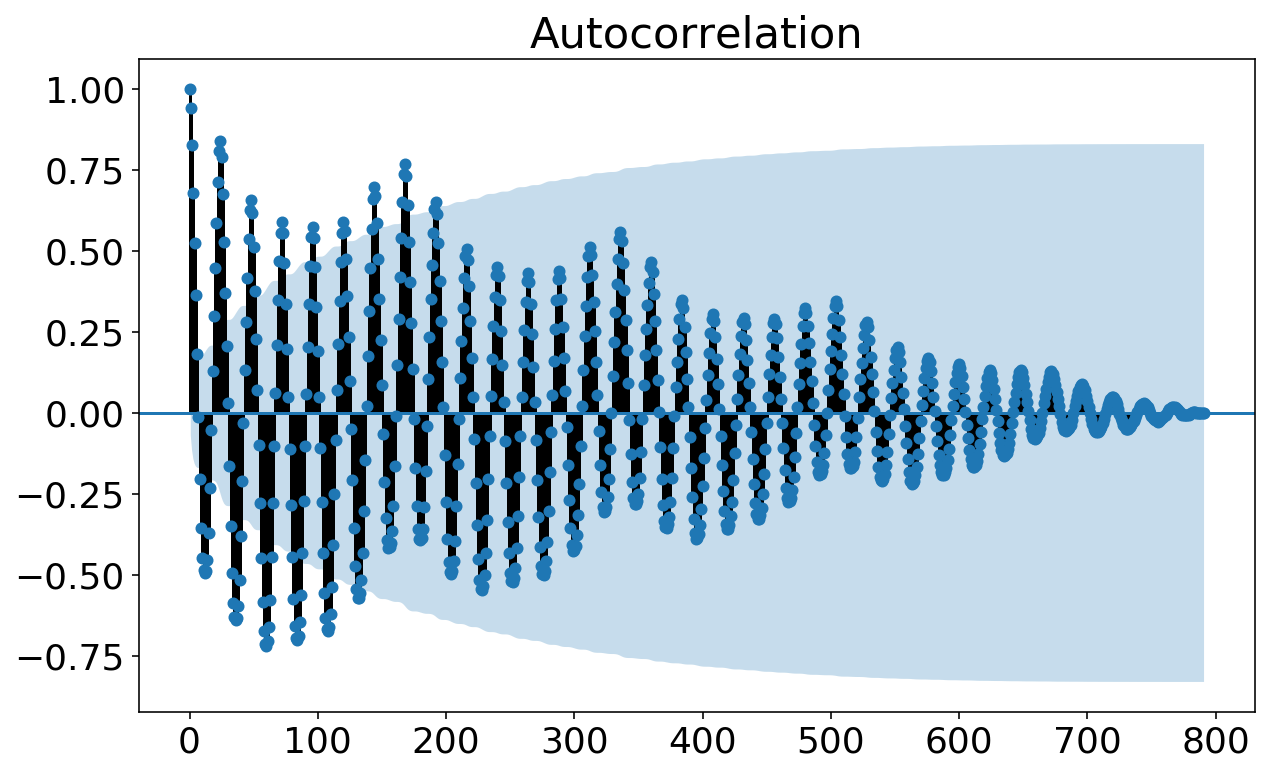

In [109]:
fig,ax=plt.subplots(1,1,figsize=(10,6))
plot_acf(access_per_hour,alpha=0.05, use_vlines=True, ax=ax).show()

/home/xuanli2/penv/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


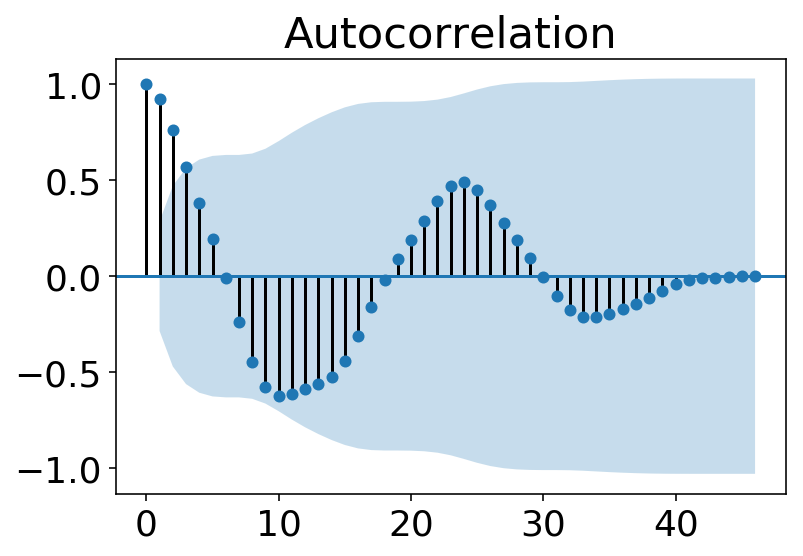

In [110]:
#From acf plot, we can easily see the periodic effect
matplotlib.rcParams.update({'font.size': 18})
time_series = access_per_hour[1:48]
time_series = time_series - np.mean(time_series)
plot_acf(time_series,alpha=0.05, use_vlines=True).show() 

# hypothesis 2:People tend to visit Wikipedia more on weekdays than on weekends

In [111]:
X=[('Monday', 1154764.25),
 ('Tuesday', 1139720.54),
 ('Wednesday', 1142978.55),
 ('Thursday', 1123634.65),
 ('Friday', 1025517.45),
 ('Saturday', 879366.8666666667),
 ('Sunday', 988040.7931034482)]
type(X)
len(X)
X[1][1]

1139720.54

In [112]:
y = []
for i in range(0,7):
    y.append(X[i][1])
y

[1154764.25,
 1139720.54,
 1142978.55,
 1123634.65,
 1025517.45,
 879366.8666666667,
 988040.7931034482]

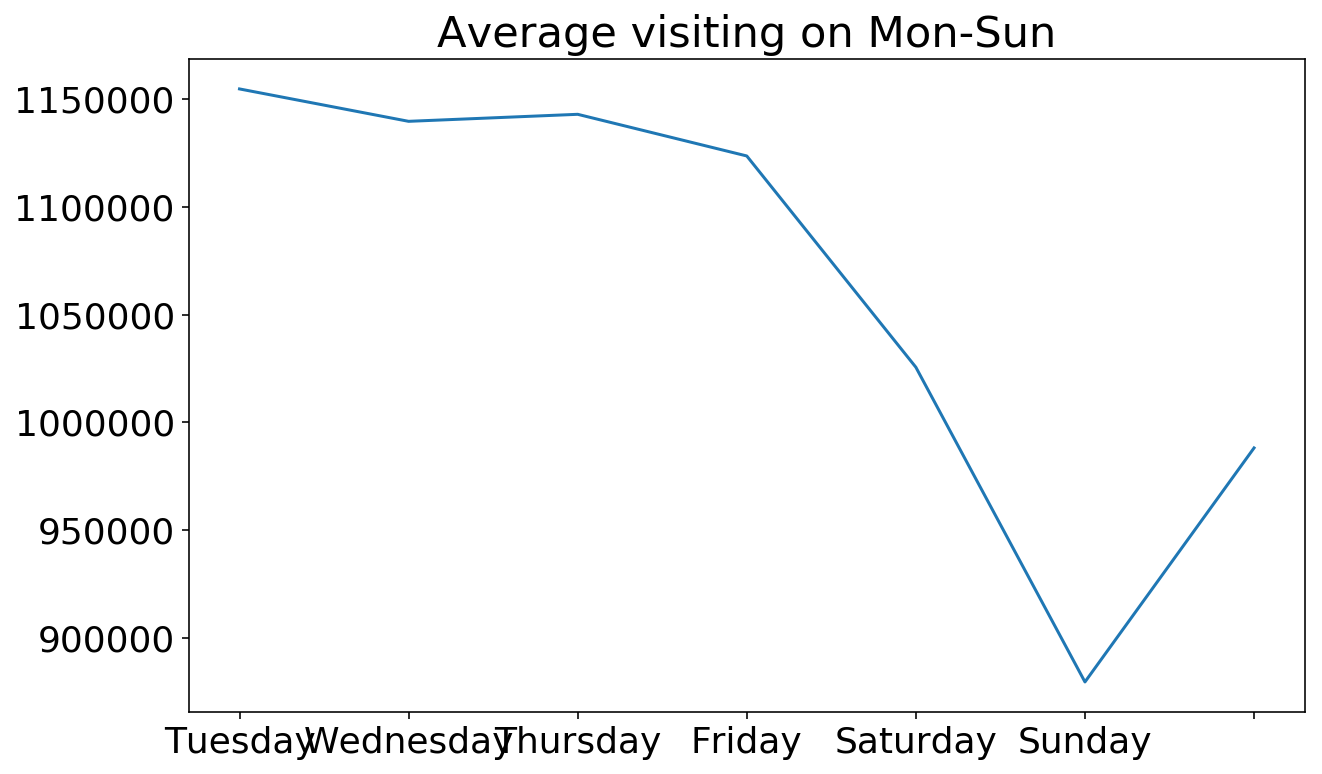

In [120]:
#y = [1154764.25,1139720.54,1142978.55,1123634.65,1025517.45,879366.8666666667,988040.7931034482]
#x = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#plt.xlabel(xlabel)
plt.figure(figsize=(10,6))
plt.gca().set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);
plt.title('Average visiting on Mon-Sun')
plt.plot(y)

In [114]:
access_by_weekday =  load_data('data/dump/bucket_by_weekday.pkl')
Monday =list(access_by_weekday['Monday'])
Tuesday = list(access_by_weekday['Tuesday'])
Wednesday = list(access_by_weekday['Wednesday'])
Thursday = list(access_by_weekday['Thursday'])
Friday = list(access_by_weekday['Friday'])
Saturday = list(access_by_weekday['Saturday'])
Sunday = list(access_by_weekday['Sunday'])

In [115]:
weekday = Monday+Tuesday+Wednesday+Thursday+Friday
weekend = Saturday + Sunday

In [116]:
scipy.stats.ttest_ind(weekday,weekend,equal_var=False)

Ttest_indResult(statistic=11.24054449457426, pvalue=4.084944675076398e-26)

# Hypothesis 3: Visiting count distribution is the same every week


In [117]:
from datetime import datetime
from datetime import timedelta
def update_sorted_by_access(dictionary):
    tuples = [(index, dictionary[index]) for index in dictionary.keys()] 
    return sorted(tuples, key = lambda x: x[0]) 


access_by_hour = load_data("data/dump/access_by_hour.pkl")
series = update_sorted_by_access(access_by_hour)

from datetime import timedelta
from datetime import date
def hour_to_datetime(hour):
    return datetime(2007,9,1) + timedelta(hours=hour)

series = {hour_to_datetime(data[0]): data[1] for data in series}

bucket_by_weeks = {38: [], 39: [], 40: [], 41: [], 42: []}
for index,count in series.items():
    weekno = date(index.year, index.month, index.day).isocalendar()[1] 
    if weekno in bucket_by_weeks:
        bucket_by_weeks[date(index.year, index.month, index.day).isocalendar()[1]].append(count)

In [118]:
from scipy.stats import ks_2samp
print("Week 39 and 40", ks_2samp(bucket_by_weeks[39], bucket_by_weeks[40]))
print("Week 40 and 41", ks_2samp(bucket_by_weeks[40], bucket_by_weeks[41]))
print("Week 41 and 42", ks_2samp(bucket_by_weeks[41], bucket_by_weeks[42]))

Week 39 and 40 Ks_2sampResult(statistic=0.06547619047619047, pvalue=0.852499629811771)
Week 40 and 41 Ks_2sampResult(statistic=0.08333333333333337, pvalue=0.5856933951622363)
Week 41 and 42 Ks_2sampResult(statistic=0.08594657375145176, pvalue=0.5534353719549807)
